In [1]:
import pandas

In [2]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'

Data taken from https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [3]:
df = pandas.read_csv('../../data/credit/german.data', sep=' ',
                     names=features+[target])

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
def make_hist(attr):
    vals = [d[attr].values for _,d in df.groupby('repaid')]
    plt.hist(vals, stacked=True)

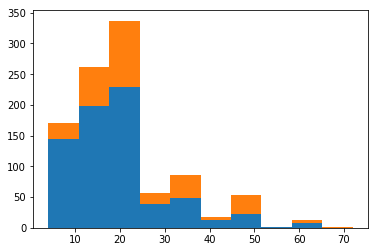

In [7]:
make_hist('duration')

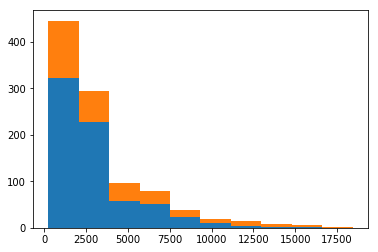

In [8]:
make_hist('amount')

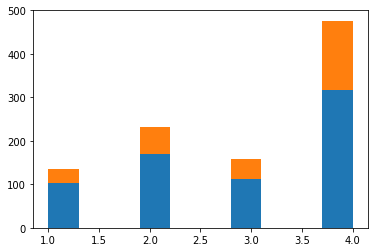

In [9]:
make_hist('installment')

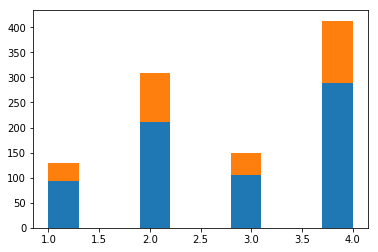

In [10]:
make_hist('residence time')

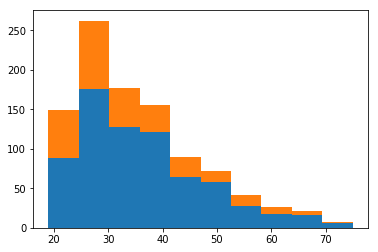

In [11]:
make_hist('age')

In [12]:
numerical_features = ['age', 'residence time', 'installment', 'amount', 'duration', 'persons', 'credits']
quantitative_features = list(filter(lambda x: x not in numerical_features, features))

In [13]:
X = pandas.get_dummies(df, columns=quantitative_features, drop_first=True)

In [14]:
encoded_features = list(filter(lambda x: x != target, X.columns))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer

In [16]:
cross_val_score(LogisticRegression(),
                X[encoded_features],
                X[target],
                scoring=make_scorer(accuracy_score),
                cv=10)

array([0.8 , 0.73, 0.73, 0.77, 0.73, 0.78, 0.67, 0.8 , 0.75, 0.76])

In [17]:
for train, test in KFold(n_splits=5).split(X):
    Xtr, Xte = X[encoded_features].iloc[train], X[encoded_features].iloc[test]
    ytr, yte = X[target].iloc[train], X[target].iloc[test]
    y_pred = LogisticRegression().fit(Xtr, ytr).predict(Xte)
    print(confusion_matrix(yte, y_pred))

[[127  16]
 [ 33  24]]
[[132  17]
 [ 23  28]]
[[118  13]
 [ 43  26]]
[[117  21]
 [ 33  29]]
[[117  22]
 [ 28  33]]


In [18]:
import statsmodels.formula.api as sma

In [19]:
X.columns

Index(['duration', 'amount', 'installment', 'residence time', 'age', 'credits',
       'persons', 'repaid', 'checking account balance_A12',
       'checking account balance_A13', 'checking account balance_A14',
       'credit history_A31', 'credit history_A32', 'credit history_A33',
       'credit history_A34', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'savings_A62', 'savings_A63',
       'savings_A64', 'savings_A65', 'employment_A72', 'employment_A73',
       'employment_A74', 'employment_A75', 'marital status_A92',
       'marital status_A93', 'marital status_A94', 'other debtors_A102',
       'other debtors_A103', 'property_A122', 'property_A123', 'property_A124',
       'other installments_A142', 'other installments_A143', 'housing_A152',
       'housing_A153', 'job_A172', 'job_A173', 'job_A174', 'phone_A192',
       'foreign_A202'],
      dtype='object')

In [20]:
logit_features = ['age', 'duration', 'checking account balance_A12',
                  'checking account balance_A13',
           'checking account balance_A14']

In [21]:
model = sma.Logit(X[target]-1, X[logit_features]).fit()

Optimization terminated successfully.
         Current function value: 0.523765
         Iterations 6


In [22]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                   Logit                No. Iterations:       6.0000   
Dependent Variable:      repaid               Pseudo R-squared:     0.143    
Date:                    2018-07-20 12:17     AIC:                  1057.5302
No. Observations:        1000                 BIC:                  1082.0690
Df Model:                4                    Log-Likelihood:       -523.77  
Df Residuals:            995                  LL-Null:              -610.86  
Converged:               1.0000               Scale:                1.0000   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
age                          -0.0207   0.0042  -4.9636 0.0000 -0.0288 -0.0125
duration                      0.0351   0.0056   6.2546 0.0000  0.0241  0.0461
checking account balance_A12 -0.5593   0.1715  -3.2624 0.0011 -0.8954 -0.2233
checking account balance_A13 -1.1412   0.3278  -3.4817 0.0005 -1.7837 -0.4988
checking account balance_A14 -2.0552   0.1967 -10.4464 0.0000 -2.4408 -1.6696
=============================================================================

"""